In [25]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file_path = 'mp1_av_disengagements.csv'
df = pd.read_csv(file_path)
df.shape

(1024, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          1024 non-null   object 
 1   Car            1024 non-null   object 
 2   Location       1024 non-null   object 
 3   Weather        1024 non-null   object 
 4   TypeOfTrigger  1024 non-null   object 
 5   ReactionTime   492 non-null    float64
 6   Cause          1024 non-null   object 
dtypes: float64(1), object(6)
memory usage: 56.1+ KB


In [6]:
df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [8]:
df['Weather'].value_counts()

Weather
cloudy    835
clear     189
Name: count, dtype: int64

---

Given below are some assumptions that you will need to do the analysis for this task.
1. There can be at most one disengagement per mile.
2. The total amount of miles driven by all the AVs in the dataset is 505229 miles.
3. A day can be either clear or cloudy, but not both. The probability of a day being
clear in California is 72% [7].
4. The AV is equally likely to drive on a cloudy day as on a clear day.

---

1. Based on the above assumptions, answer the following questions on basic
probability. (6 points)

<font color=yellow>a. </font>

The assumption of at most one disengagement per mile suggests that the occurrence of disengagements can be treated as a **Poisson distribution**. This is because a Poisson distribution is typically used for modeling the number of events occurring within a fixed interval of time or space, given that these events occur with a known constant mean rate and independently of the time since the last event.

<font color=yellow>b. & c. </font>

In [9]:
disengagement_counts = df['Weather'].value_counts()
total_miles_driven = len(df)

probability_cloudy = disengagement_counts['cloudy'] / total_miles_driven
probability_clear = disengagement_counts['clear'] / total_miles_driven
probability_cloudy, probability_clear


(0.8154296875, 0.1845703125)

- Probability of disengagement per mile on a cloudy day: 0.8154
- Probability of disengagement per mile on a clear day: 0.1846

<font color=yellow>d.  </font>

In [10]:
automatic_disengagements = df[df['TypeOfTrigger'] == 'automatic']
automatic_disengagement_counts = automatic_disengagements['Weather'].value_counts()

probability_automatic_cloudy = automatic_disengagement_counts['cloudy'] / total_miles_driven
probability_automatic_clear = automatic_disengagement_counts['clear'] / total_miles_driven

probability_automatic_cloudy, probability_automatic_clear

(0.3876953125, 0.09375)

- Probability of an automatic disengagement per mile on a cloudy day: 0.3877
- Probability of an automatic disengagement per mile on a clear day: 0.0938

<font color=yellow>e.  </font>

To answer this question, we'll use the Central Limit Theorem (CLT). The CLT states that the distribution of the sum (or average) of a large number of independent and identically distributed random variables will approximate a normal distribution, regardless of the original distribution.

We will follow these steps:

1. Calculate the expected number of disengagements for 10,000 miles under cloudy conditions using the probability of disengagement per mile on a cloudy day.
2. Determine the standard deviation of disengagements for 10,000 miles.
3. Use the normal distribution approximation to calculate the probability of having 100 or more disengagements.

In [15]:
p_cloudy = probability_cloudy

miles = 10000

mean_disengagements_cloudy = p_cloudy * miles
std_dev_disengagements_cloudy = (miles * p_cloudy * (1 - p_cloudy)) ** 0.5

# Calculate the probability of having 100 or more disengagements using the normal distribution
prob_100_or_more = 1 - stats.norm.cdf(100, loc=mean_disengagements_cloudy, scale=std_dev_disengagements_cloudy)
mean_disengagements_cloudy, std_dev_disengagements_cloudy, prob_100_or_more

(8154.296875, 38.7948594846859, 1.0)

- Expected number of disengagements in 10,000 miles: 8154.3
- Standard deviation of disengagements: 38.79
- The probability of having 100 or more disengagements in 10,000 miles under cloudy conditions is approximately 1.0. This result indicates that it is almost certain to have at least 100 disengagements in 10,000 miles under these conditions, given the high expected number of disengagements.

----

2. Assuming that the disengagement per mile is a random variable with the
distribution you answered in Task 3.1.a, and the weather condition is cloudy.
(6points)

<font color=yellow>a. Distribution of "the number of miles until the next disengagement"</font>

The number of miles until the next disengagement can be modeled using an Exponential distribution. This is because:

1. Poisson Process: If the number of disengagements per mile follows a Poisson distribution (as established in Task 3.1.a), the time (or in this case, distance) between consecutive events (disengagements) follows an Exponential distribution.
2. Memoryless Property: The Exponential distribution is appropriate for modeling the time (or distance) between events in a Poisson process because it is memoryless. This means that the probability of a disengagement occurring in the next mile is independent of how long it has been since the last disengagement.

In [16]:
# The rate parameter (lambda) is the probability of disengagement per mile under cloudy conditions
rate_lambda = probability_cloudy

# For Exponential distribution, the mean and standard deviation are both equal to 1/lambda
mean_exponential = 1 / rate_lambda
rate_lambda, mean_exponential

(0.8154296875, 1.2263473053892215)

- Rate parameter (𝜆): 0.8154 (expected number of disengagements per mile under cloudy conditions)
- Mean number of miles until the next disengagement: 1.2263 miles

<font color=yellow>b. Distribution of “the number of disengagements in 10,000 miles</font>

The number of disengagements in 10,000 miles follows a Binomial distribution because:

1. Independent Trials: Each mile can be considered an independent trial where a disengagement either occurs or does not occur.
2. Fixed Number of Trials: We have a fixed number of trials, 𝑛= 10,000 miles.
3. Probability of Success: The probability of a disengagement per mile (probability of "success") is given by 𝑝 = 0.8154.

In [20]:
# Parameters for the Binomial distribution
n_trials = 10000  # Number of miles (trials)
p_success = probability_cloudy  # Probability of disengagement per mile (success)

mean_binomial = n_trials * p_success # Mean of the Binomial distribution
variance_binomial = n_trials * p_success * (1 - p_success) # Variance of the Binomial distribution
std_dev_binomial = variance_binomial ** 0.5
mean_binomial, variance_binomial, std_dev_binomial

(8154.296875, 1505.0411224365234, 38.7948594846859)

The parameters of the Binomial distribution for the number of disengagements in 10,000 miles under cloudy conditions are as follows:

- Mean (𝜇): 8154.3 disengagements
- Variance (𝜎2): 1505.04
- Standard deviation (𝜎): 38.79

This means, on average, there are around 8154 disengagements in 10,000 miles, with a standard deviation of approximately 38.79 disengagements under cloudy conditions.

<font color=yellow>c. Approximate Distribution:</font>

When the number of trials n is large and the probability of success p is small, the Binomial distribution can be approximated by a Poisson distribution. This approximation is valid under the condition that the mean (𝜇 = 𝑛 × 𝑝) remains moderate.

The parameter of the Poisson distribution is:
- Rate parameter (𝜆): 𝜆 = 𝑛 × 𝑝

In [23]:
# Rate parameter (lambda) for the Poisson distribution
lambda_poisson = mean_binomial
lambda_poisson

8154.296875

<font color=yellow>d. Plot the probability mass function (PMF) </font>of the distribution in Task 3.2.b and
Task 3.2.c

In [28]:
# Define the range for x-axis
x_range_1 = np.arange(0, 10001)  # Range between 0 and 10000
x_range_2 = np.arange(0, 101)    # Range between 0 and 100

# Calculate the PMF for the Binomial distribution
pmf_binomial_1 = stats.binom.pmf(x_range_1, n_trials, p_success)
pmf_binomial_2 = stats.binom.pmf(x_range_2, n_trials, p_success)

# Calculate the PMF for the Poisson distribution (using lambda from the approximation)
pmf_poisson_1 = stats.poisson.pmf(x_range_1, lambda_poisson)
pmf_poisson_2 = stats.poisson.pmf(x_range_2, lambda_poisson)

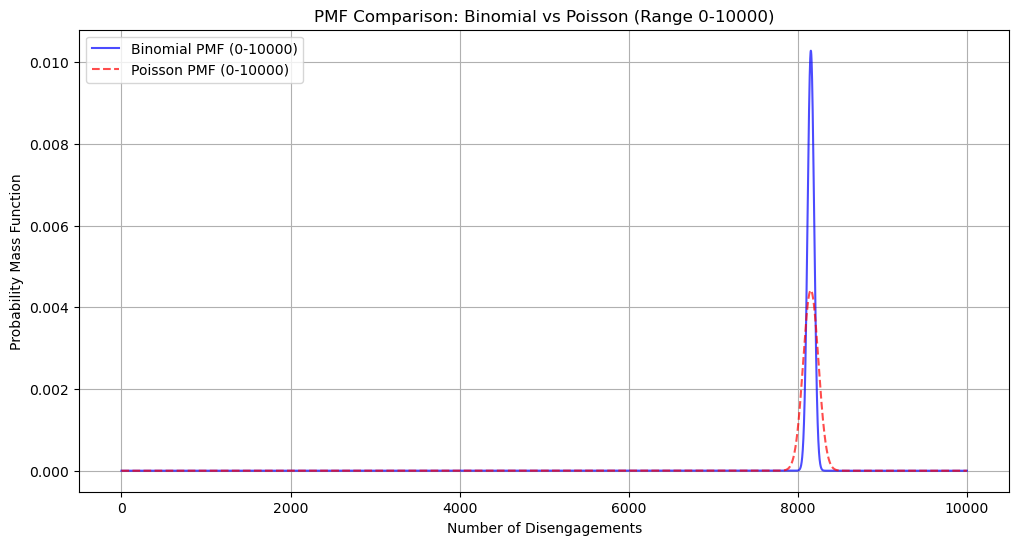

In [29]:
# Plot PMF for range 0 to 10000
plt.figure(figsize=(12, 6))
plt.plot(x_range_1, pmf_binomial_1, label='Binomial PMF (0-10000)', color='blue', alpha=0.7)
plt.plot(x_range_1, pmf_poisson_1, label='Poisson PMF (0-10000)', color='red', linestyle='--', alpha=0.7)
plt.title('PMF Comparison: Binomial vs Poisson (Range 0-10000)')
plt.xlabel('Number of Disengagements')
plt.ylabel('Probability Mass Function')
plt.legend()
plt.grid()
plt.show()


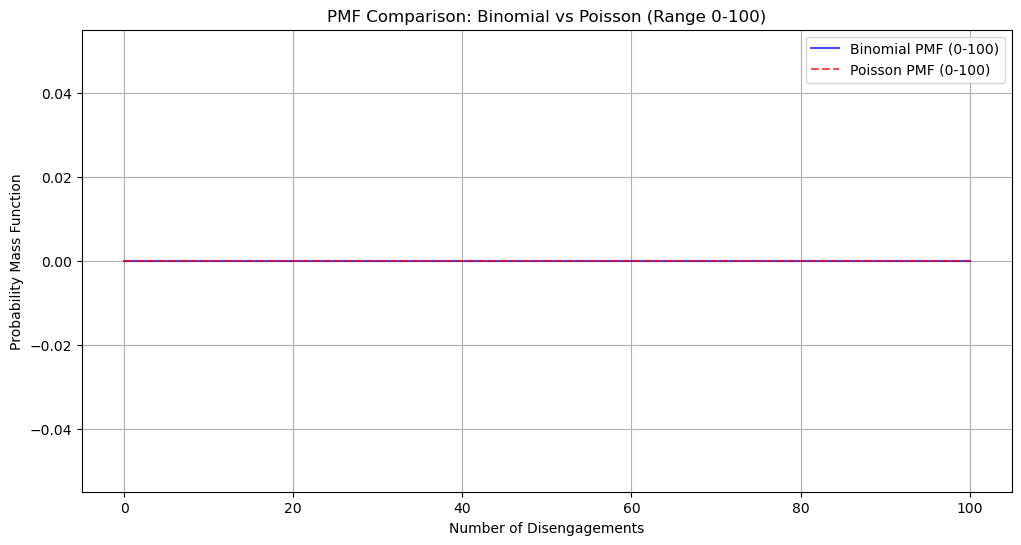

In [30]:
# Plot PMF for range 0 to 100
plt.figure(figsize=(12, 6))
plt.plot(x_range_2, pmf_binomial_2, label='Binomial PMF (0-100)', color='blue', alpha=0.7)
plt.plot(x_range_2, pmf_poisson_2, label='Poisson PMF (0-100)', color='red', linestyle='--', alpha=0.7)
plt.title('PMF Comparison: Binomial vs Poisson (Range 0-100)')
plt.xlabel('Number of Disengagements')
plt.ylabel('Probability Mass Function')
plt.legend()
plt.grid()
plt.show()

1. Plot 1: PMF Comparison for Range 0-10,000

- The probability mass function (PMF) for both the Binomial and Poisson distributions shows a sharp peak around the mean (8154 disengagements).
- The Poisson distribution closely approximates the Binomial distribution in this range, which is expected given the large number of trials (10,000 miles) and small probability of disengagement per mile (0.8154).
- Due to the high mean, the PMF is concentrated around the mean value, and probabilities for values far from the mean drop sharply.

2.  Plot 2: PMF Comparison for Range 0-100

- In this range, the PMF for both the Binomial and Poisson distributions are almost zero for all values, reflecting that it's extremely unlikely to have so few disengagements in 10,000 miles.
- This plot emphasizes that the probability of observing less than 100 disengagements is practically zero given the high mean of approximately 8154 disengagements.

Findings:
- The Poisson distribution serves as a good approximation for the Binomial distribution when the number of trials is large and the probability of success is small.
- Both distributions peak around the expected value and are nearly indistinguishable at the expected mean, confirming the effectiveness of the Poisson approximation in such scenarios.
- The visual similarity between the two distributions in the wider range (0-10,000) further supports this approximation. However, in a narrower range (0-100), both distributions show negligible probability, which aligns with the expectation of high disengagement numbers under cloudy conditions.

<font color=yellow>e. </font>

In Task 3.1.e, we aimed to find the probability of having 100 or more disengagements in 10,000 miles under cloudy conditions. We previously calculated this probability using the Central Limit Theorem (CLT), which yielded a probability of approximately 1.0.

Now, we will use the Cumulative Distribution Function (CDF) of the Poisson distribution (as determined in Task 3.2.c) to calculate the probability of having fewer than 100 disengagements. We can then subtract this probability from 1 to get the probability of having 100 or more disengagements.

In [31]:
# Calculate the CDF for fewer than 100 disengagements using the Poisson distribution
cdf_less_than_100 = stats.poisson.cdf(99, lambda_poisson)
prob_100_or_more_poisson = 1 - cdf_less_than_100
cdf_less_than_100, prob_100_or_more_poisson

(0.0, 1.0)

Findings:
- CDF for fewer than 100 disengagements P(X<100)): 0.0
- Probability of 100 or more disengagements: 1.0

This means that the probability of having fewer than 100 disengagements is virtually zero, and thus the probability of having 100 or more disengagements is effectively 1.0.

Comparison:
- Both the CLT-based approximation and the Poisson CDF calculation yield a probability of 1.0 for having 100 or more disengagements in 10,000 miles under cloudy conditions.
- This strong agreement between the two methods further supports the robustness of our conclusion: given the high expected number of disengagements (8154.3), it is almost certain to have at least 100 disengagements.

---

### 3. What’s the conditional probability that the reaction time is: (4 points)

<font color=yellow>a. Greater than 0.4s given that the weather was cloudy? </font>Reaction time is
measured only in cases where there was an automatic disengagement. (2
points

In [33]:
# Filter the dataset for automatic disengagements
auto_disengagements = df[df['TypeOfTrigger'] == 'automatic']

# Filter for cloudy weather and reaction time greater than 0.4s
cloudy_disengagements = auto_disengagements[auto_disengagements['Weather'] == 'cloudy']
cloudy_greater_0_4s = cloudy_disengagements[cloudy_disengagements['ReactionTime'] > 0.4]

# Probability of ReactionTime > 0.4s given cloudy weather
prob_cloudy_greater_0_4s = len(cloudy_greater_0_4s) / len(cloudy_disengagements)
prob_cloudy_greater_0_4s

0.6120906801007556

Probability that the reaction time is greater than 0.4 seconds given that the weather was cloudy:
- P(Reaction Time>0.4s∣Cloudy)=0.612
- This indicates that there is a 61.2% chance that the reaction time exceeds 0.4 seconds in automatic disengagement cases under cloudy conditions.

<font color=yellow>b. Greater than 0.7s given that the weather was clear? </font>Reaction time is
measured only in cases where there was an automatic disengagement. (2 points)

In [35]:
# Filter for clear weather and reaction time greater than 0.7s
clear_disengagements = auto_disengagements[auto_disengagements['Weather'] == 'clear']
clear_greater_0_7s = clear_disengagements[clear_disengagements['ReactionTime'] > 0.7]

# Probability of ReactionTime > 0.7s given clear weather
prob_clear_greater_0_7s = len(clear_greater_0_7s) / len(clear_disengagements)
prob_clear_greater_0_7s

0.3854166666666667

Probability that the reaction time is greater than 0.7 seconds given that the weather was clear:
- P(Reaction Time>0.7s∣Clear)=0.385
- This indicates that there is a 38.5% chance that the reaction time exceeds 0.7 seconds in automatic disengagement cases under clear conditions.

---

### 4. A study found that an automatic AV disengagement 
will result in an accident if
the human driver is slow in reacting. Following reactions are considered slow: (i) a
reaction time greater than 0.4s under cloudy conditions and, (ii) a reaction time
greater than 0.7s under clear conditions. Find the probability of an accident per mile
due to automatic AV disengagement and slow reaction. (2 points)

In [36]:
# Calculate the probability of slow reaction and automatic disengagement per mile

# Probability of automatic disengagement per mile under cloudy and clear conditions
prob_auto_cloudy = automatic_disengagement_counts['cloudy'] / total_miles_driven
prob_auto_clear = automatic_disengagement_counts['clear'] / total_miles_driven

# Probability of accident per mile due to slow reaction under cloudy conditions
prob_accident_cloudy = prob_auto_cloudy * prob_cloudy_greater_0_4s

# Probability of accident per mile due to slow reaction under clear conditions
prob_accident_clear = prob_auto_clear * prob_clear_greater_0_7s

# Overall probability of an accident per mile
prob_accident_per_mile = prob_accident_cloudy + prob_accident_clear

prob_accident_cloudy, prob_accident_clear, prob_accident_per_mile

(0.23730468749999997, 0.0361328125, 0.2734375)

Results:
- Probability of an accident per mile due to slow reaction under cloudy conditions: 0.2373
- Probability of an accident per mile due to slow reaction under clear conditions: 0.0361
- Overall probability of an accident per mile due to automatic AV disengagement and slow reaction: 0.2734

This means that, on average, there is a 27.34% chance of an accident per mile due to slow reaction times following an automatic AV disengagement, with the majority of the risk associated with cloudy weather conditions

---

### 5. Next, you will investigate how to diagnose the cause of an AV disengagement based on new observations.
(4 points)

<font color=yellow> a. An AV had a disengagement with a reaction time greater than 0.4s on a
cloudy day. </font>What is the posterior probability that the root cause of the
disengagement was “Software Froze”? (2 points)

P(Software Froze∣Reaction Time>0.4s,Cloudy)=  
- P(Reaction Time>0.4s,Cloudy∣Software Froze)×P(Software Froze)  / P(Reaction Time>0.4s,Cloudy)

In [41]:
# Prior probability of "Software Froze" as a cause
prior_software_froze = len(cloudy_disengagements[cloudy_disengagements['Cause'] == 'Software Froze']) / len(cloudy_disengagements)

# Likelihood: Probability of ReactionTime > 0.4s on a cloudy day given "Software Froze"
cloudy_software_froze = cloudy_disengagements[cloudy_disengagements['Cause'] == 'Software Froze']
likelihood_reactiontime_given_software_froze = len(cloudy_software_froze[cloudy_software_froze['ReactionTime'] > 0.4]) / len(cloudy_software_froze)

# Total probability of ReactionTime > 0.4s given cloudy conditions
total_prob_reactiontime_cloudy = prob_cloudy_greater_0_4s

# Posterior probability using Bayes' Theorem
posterior_software_froze = (likelihood_reactiontime_given_software_froze * prior_software_froze) / total_prob_reactiontime_cloudy
prior_software_froze, likelihood_reactiontime_given_software_froze, posterior_software_froze

(0.04785894206549118, 0.6842105263157895, 0.053497942386831275)

Results:
- Prior Probability (P(Software Froze)): 0.0479
- Likelihood ( P(Reaction Time>0.4s,Cloudy ∣ Software Froze)): 0.6842
- Posterior Probability ( P(Software Froze ∣ Reaction Time>0.4s,Cloudy)): 0.0535

This means that given a reaction time greater than 0.4 seconds on a cloudy day, the probability that the root cause of the disengagement was "Software Froze" is approximately 5.35%. Despite the high likelihood, the low prior probability reduces the posterior probability.

<font color=yellow> b. </font>What is the posterior probability that the root cause of the disengagement
was <font color=yellow> “Software Froze if the disengagement happened on a clear day with reaction
time greater than 0.7s.

Bayes' Theorem:

P(Software Froze ∣ Reaction Time>0.7s,Clear)= 
- P(Reaction Time>0.7s,Clear ∣ Software Froze) × P(Software Froze) / P(Reaction Time>0.7s,Clear)  

In [43]:
# Prior probability of "Software Froze" as a cause under clear conditions
prior_software_froze_clear = len(clear_disengagements[clear_disengagements['Cause'] == 'Software Froze']) / len(clear_disengagements)

# Likelihood: Probability of ReactionTime > 0.7s on a clear day given "Software Froze"
clear_software_froze = clear_disengagements[clear_disengagements['Cause'] == 'Software Froze']
likelihood_reactiontime_given_software_froze_clear = len(clear_software_froze[clear_software_froze['ReactionTime'] > 0.7]) / len(clear_software_froze)

# Total probability of ReactionTime > 0.7s given clear conditions
total_prob_reactiontime_clear = prob_clear_greater_0_7s

# Posterior probability using Bayes' Theorem
posterior_software_froze_clear = (likelihood_reactiontime_given_software_froze_clear * prior_software_froze_clear) / total_prob_reactiontime_clear

prior_software_froze_clear, likelihood_reactiontime_given_software_froze_clear, posterior_software_froze_clear

(0.3125, 0.3, 0.24324324324324323)

Results:
- Prior Probability (P(Software Froze)): 0.3125
- Likelihood ( P(Reaction Time>0.7s, Clear ∣ Software Froze)): 0.3
- P(Software Froze ∣ Reaction Time>0.7s, Clear): 0.2432

This means that given a reaction time greater than 0.7 seconds on a clear day, the probability that the root cause of the disengagement was "Software Froze" is approximately 24.32%.

----

### 6. In this question, you will construct a Naive Bayes model to infer the root cause of disengagement scenarios of AVs.
Naive Bayes assumes that the factors are class
conditionally independent. We assume that both Location (urban-street or highway)
and Weather (cloudy or clear) are factors related to the Cause (consider the Cause
has 3 different values, “Software Froze”, “Hardware Fault” or “Other”), and Location
and Weather are independent given the Cause. Answer the following questions: (8
points)

<font color= 'yellow'>a. Draw a graph for the Naive Bayes model described in the question.

Structure:
- Cause is the parent node, with three possible values: "Software Froze", "Hardware Fault", or "Other".
- Location and Weather are child nodes that are conditionally independent given the Cause.

Here is the graphical representation of the Naive Bayes model:

In [47]:
#     Cause
#    /     \
#   /       \
# Location  Weather

In this model:

- The Cause influences both Location and Weather.
- Location and Weather are independent of each other when the value of Cause is known.

<font color= 'yellow'> b. Count the number of parameters needed to define the Naive Bayes model </font>

(including the prior and the conditional probability distributions). (2 points)

1. Prior Probabilities for Cause (3 values): 2 parameters.
2. Conditional Probabilities:
- Location given Cause: 3 parameters (1 for each Cause).
- Weather given Cause: 3 parameters (1 for each Cause).

Total Parameters: 2 (Prior) + 3 (Location) + 3 (Weather) = 8 parameters.

<font color= 'yellow'>  c.  Based on the number of parameters needed, derive, and show the
conditional probability tables and prior probability from the given dataset to infer
the Cause </font>

In [49]:
# Calculate prior probabilities for each Cause
prior_cause_prob = df['Cause'].value_counts(normalize=True)

# Conditional probabilities for Location given Cause
location_given_cause = pd.crosstab(df['Cause'], df['Location'], normalize='index')

# Conditional probabilities for Weather given Cause
weather_given_cause = pd.crosstab(df['Cause'], df['Weather'], normalize='index')

In [50]:
# 1. Prior Probability of Causes:
prior_cause_prob

Cause
Unwanted Driver Discomfort                 0.125000
Recklessly behaving agent                  0.121094
Incorrect behavior prediction of others    0.106445
Hardware Fault                             0.101562
System Tuning and Calibration              0.099609
Emergency Vehicle                          0.095703
Software Froze                             0.095703
Incorrect Traffic Light Detection          0.093750
Adverse road surface conditions            0.083008
Position Estimation Failure                0.078125
Name: proportion, dtype: float64

In [51]:
# 2. Conditional Probability Table for Location Given Cause:
location_given_cause

Location,highway,urban-street
Cause,,
Adverse road surface conditions,0.000000,1.000000
Emergency Vehicle,0.000000,1.000000
Hardware Fault,0.086538,0.913462
Incorrect Traffic Light Detection,0.000000,1.000000
Incorrect behavior prediction of others,0.000000,1.000000
Position Estimation Failure,0.000000,1.000000
Recklessly behaving agent,0.000000,1.000000
Software Froze,0.061224,0.938776
System Tuning and Calibration,0.049020,0.950980


In [53]:
# 3. Conditional Probability Table for Weather Given Cause:
weather_given_cause

Weather,clear,cloudy
Cause,,
Adverse road surface conditions,0.000000,1.000000
Emergency Vehicle,0.000000,1.000000
Hardware Fault,0.557692,0.442308
Incorrect Traffic Light Detection,0.000000,1.000000
Incorrect behavior prediction of others,0.000000,1.000000
Position Estimation Failure,0.000000,1.000000
Recklessly behaving agent,0.008065,0.991935
Software Froze,0.612245,0.387755
System Tuning and Calibration,0.686275,0.313725


Summary:
- The prior probabilities indicate the baseline likelihood of each cause.
- The conditional probabilities show the likelihood of observing a specific Location or Weather given the Cause.
- These tables provide the necessary information to apply the Naive Bayes model for inferring the cause of disengagements based on new observations of location and weather conditions.

<font color = 'yellow'> d. According to the conditional probability tables you derived </font>, what is the most
probable root cause of disengagement given the Weather was cloudy and the
Location was urban-street

To find the most probable root cause of disengagement given that the weather was cloudy and the location was urban-street, we need to compute the posterior probability for each cause using the Naive Bayes formula:
- P(Cause∣Cloudy,Urban-Street)∝P(Cloudy∣Cause)×P(Urban-Street∣Cause)×P(Cause

In [55]:
# Calculate posterior probabilities for each cause given Weather = 'Cloudy' and Location = 'urban-street'

# Filtering relevant probabilities from the tables
posterior_probabilities = {}

for cause in prior_cause_prob.index:
    # Prior probability of the cause
    prior = prior_cause_prob[cause]

    # Conditional probability of 'Cloudy' given the cause
    prob_cloudy_given_cause = weather_given_cause.loc[cause, 'cloudy']

    # Conditional probability of 'Urban-Street' given the cause
    prob_urban_given_cause = location_given_cause.loc[cause, 'urban-street']

    # Naive Bayes formula
    posterior = prior * prob_cloudy_given_cause * prob_urban_given_cause

    # Store the result
    posterior_probabilities[cause] = posterior

# Convert to a pandas Series for easy sorting
posterior_prob_series = pd.Series(posterior_probabilities)

# Sort the causes by posterior probability in descending order
most_probable_cause = posterior_prob_series.idxmax()
posterior_prob_series.sort_values(ascending=False), most_probable_cause

(Unwanted Driver Discomfort                 0.125000
 Recklessly behaving agent                  0.120117
 Incorrect behavior prediction of others    0.106445
 Emergency Vehicle                          0.095703
 Incorrect Traffic Light Detection          0.093750
 Adverse road surface conditions            0.083008
 Position Estimation Failure                0.078125
 Hardware Fault                             0.041034
 Software Froze                             0.034837
 System Tuning and Calibration              0.029718
 dtype: float64,
 'Unwanted Driver Discomfort')

Results:
- The most probable root cause of disengagement given that the weather was cloudy and the location was urban-street is "Unwanted Driver Discomfort".
- "Unwanted Driver Discomfort" has the highest posterior probability, making it the most likely cause under these conditions.